Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.


Ans:- Anomaly Detection (also called Outlier Detection) is a technique used in data analysis and machine learning to identify data points, events, or patterns that deviate significantly from the normal behavior of a dataset.

 In simple words:
It means finding unusual patterns that do not fit the expected trend.

It is widely used in:

Fraud detection (e.g., unusual credit card transactions)

Network security (e.g., detecting intrusions or cyber-attacks)

Industrial systems (e.g., machine failure detection)

Healthcare (e.g., detecting abnormal heartbeats in ECG signals)

**Types of Anomalies**
1. Point Anomaly

A single data point that is very different from the rest of the data.

These are isolated unusual values.

2. Contextual Anomaly (Conditional Anomaly)

A data point is anomalous only in a specific context (depends on time, location, or surrounding conditions).

Value may be normal in one situation but abnormal in another.

3. Collective Anomaly

A group of data points is anomalous together, even though each individual point may not look abnormal.

These anomalies are detected by considering data in sequence or groups.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.


Ans:- Isolation Forest works by recursively partitioning data, isolating anomalies more quickly than normal points, making it efficient for large, high-dimensional datasets but less effective for local outliers.

Isolation Forest (iForest)
Approach: Builds a "forest" of isolation trees by randomly partitioning the data. Anomalies, being isolated faster (with shorter paths in the trees), receive a high anomaly score.

Use Cases: Ideal for detecting global anomalies in large, high-dimensional datasets, such as fraud detection, network intrusion, or system fault detection.

Strengths: Fast, scalable, interpretable, and effective for high-dimensional data.

Weaknesses: Less effective at detecting local anomalies that resemble normal data points.

2. Local Outlier Factor (LOF)
Approach

Density-based anomaly detection but local, not global.

Compares the local density of a point with the density of its neighbors.

A point is an anomaly if it has a much lower density compared to neighbors.

Suitable Use Cases

Good for detecting local anomalies (contextual anomalies).

Works well in datasets with varying densities.

Can struggle with very high-dimensional data.

3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)
Approach

Density-based clustering algorithm.

Groups data points that are close together (high density).

Points in low-density areas (far from clusters) are considered anomalies (noise).

Suitable Use Cases

Best for spatial/geographical data.

Detects clusters of arbitrary shape and anomalies that lie far from clusters.

Not suitable for very high-dimensional data.


Question 3: What are the key components of a Time Series? Explain each with one
example.

A time series is a sequence of data points collected or recorded at specific time intervals (daily, monthly, yearly, etc.).
Its main components are:

1. Trend (T)

The long-term direction of the data (increasing, decreasing, or constant).

It ignores short-term fluctuations and shows the overall movement.

2. Seasonality (S)

A repeating pattern that occurs at fixed intervals of time (daily, weekly, yearly).

Caused by seasonal factors like weather, festivals, or business cycles.

3. Cyclic Component (C)

Long-term fluctuations in data that occur due to economic or business cycles.

Unlike seasonality, cycles do not have a fixed period.

4. Irregular / Random / Noise Component (I)

Random, unpredictable variations in the data.

Usually caused by unusual events or accidents.



Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

Ans:- A stationary time series is one whose statistical properties (like mean, variance, and autocovariance) remain constant over time.

In simple words:

The series does not have trend or seasonality.

It fluctuates around a constant mean with constant variance.

Why Stationarity is Important?

Most statistical models (like AR, MA, ARIMA) assume that the input time series is stationary.

Non-stationary data leads to unreliable forecasts.

1. Visual Inspection

Plot the series.

If there is an upward/downward trend or seasonality, it’s likely non-stationary.

2. Summary Statistics

Split data into two parts and compare mean & variance.

If they differ → non-stationary.

3. Statistical Tests

Augmented Dickey-Fuller (ADF) Test

Null Hypothesis (H₀): Series is non-stationary.

If p-value < 0.05 → Reject H₀ → Series is stationary.

KPSS Test (Kwiatkowski–Phillips–Schmidt–Shin)

Null Hypothesis (H₀): Series is stationary.

If p-value < 0.05 → Reject H₀ → Series is non-stationary.



Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.

Ans :- AR, MA, ARIMA, SARIMA, and SARIMAX are time series models that progressively build upon each other to handle different complexities in data.
1. AR (Autoregressive) Model:
Structure: Predicts future values based on a linear combination of past values of the series itself. It is denoted as AR(p), where 'p' is the order of the autoregressive part (number of past observations used).
Application: Suitable for time series data exhibiting a clear dependence on its own past values, without considering moving average components or non-stationarity.

2. MA (Moving Average) Model:
Structure: Predicts future values based on a linear combination of past forecast errors (residuals). It is denoted as MA(q), where 'q' is the order of the moving average part (number of past forecast errors used).
Application: Suitable for time series data where the current value is primarily influenced by past random shocks or innovations, rather than past values of the series itself.

3. ARIMA (Autoregressive Integrated Moving Average) Model:
Structure: Combines AR and MA components with an "Integrated" (I) component, which involves differencing the data to achieve stationarity. It is denoted as ARIMA(p,d,q), where 'd' is the order of differencing.
Application: Used for non-seasonal time series data that exhibits trends or non-stationarity, as differencing helps remove these patterns before applying ARMA.

4. SARIMA (Seasonal Autoregressive Integrated Moving Average) Model:
Structure: Extends ARIMA by adding seasonal components. It is denoted as SARIMA(p,d,q)(P,D,Q)m, where (p,d,q) are non-seasonal orders, (P,D,Q) are seasonal orders, and 'm' is the number of periods in each season.
Application: Ideal for time series data that displays both non-seasonal trends/patterns and recurring seasonal patterns, such as monthly sales data with annual cycles.

5. SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous regressors) Model:
Structure: Further extends SARIMA by incorporating exogenous (external) variables. It includes the SARIMA components and adds terms for the influence of external factors on the time series.
Application: Used when the time series is influenced by external variables in addition to its own past values and seasonal patterns, such as predicting product sales based on advertising expenditure or economic indicators.


In [1]:
# Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
# and decompose it into trend, seasonality, and residual components

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [11]:
from statsmodels.datasets import get_rdataset
data = get_rdataset("AirPassengers").data

In [12]:
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
ts = data['value']

/tmp/ipython-input-1049779395.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


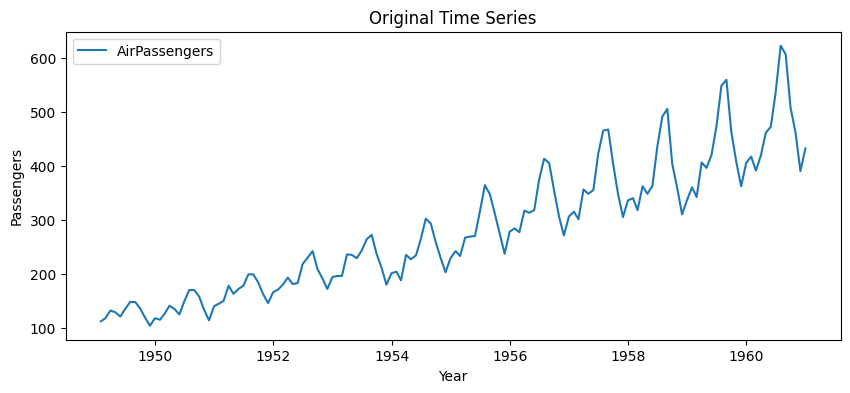

In [13]:
plt.figure(figsize=(10,4))
plt.plot(ts, label="AirPassengers")
plt.title("Original Time Series")
plt.xlabel("Year")
plt.ylabel("Passengers")
plt.legend()
plt.show()


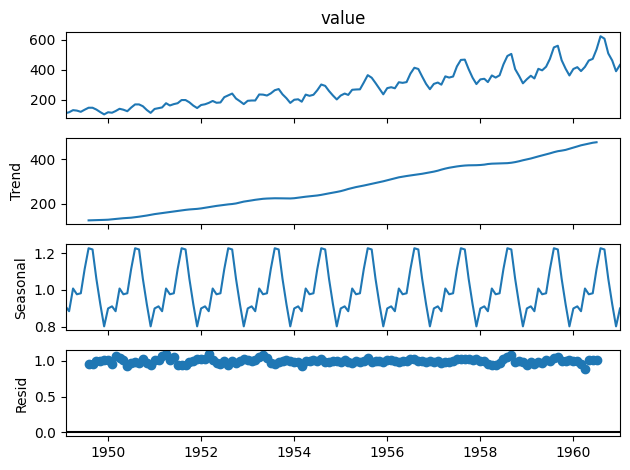

In [14]:

result = seasonal_decompose(ts, model='multiplicative')
result.plot()
plt.show()


In [15]:
# Question 8: Train a SARIMA model on the monthly airline passengers dataset.
# Forecast the next 12 months and visualize the results.
# (Include your Python code and output in the code box below.)

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.datasets import get_rdataset

In [16]:
data = get_rdataset("AirPassengers").data
data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')
data.set_index('time', inplace=True)
ts = data['value']


/tmp/ipython-input-1379743289.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data['time'] = pd.date_range(start='1949-01', periods=len(data), freq='M')


In [18]:
train = ts[:-12]
test = ts[-12:]

In [19]:
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit(disp=False)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
forecast = results.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_conf = forecast.conf_int()



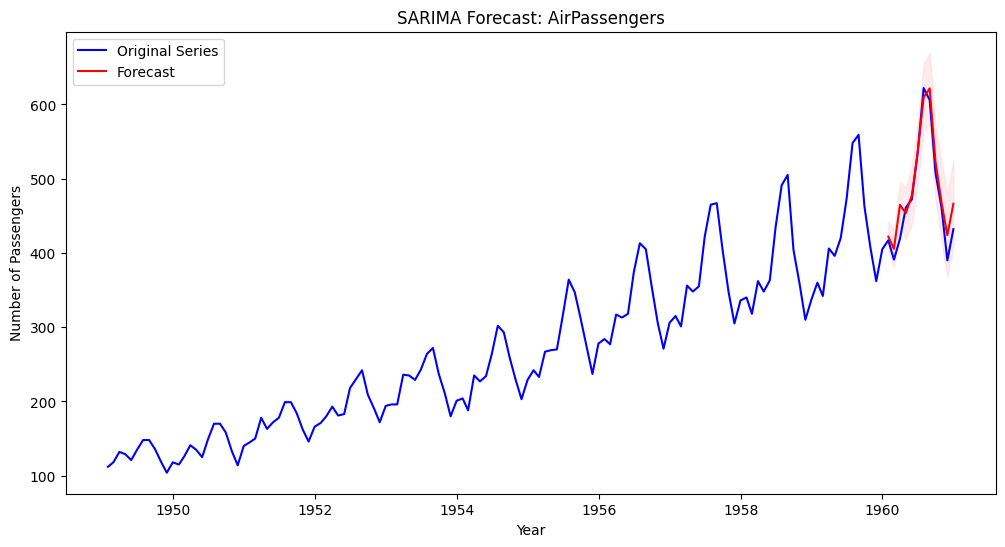

In [21]:
plt.figure(figsize=(12,6))
plt.plot(ts, label="Original Series", color="blue")
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red")
plt.fill_between(forecast_conf.index,
                 forecast_conf.iloc[:,0],
                 forecast_conf.iloc[:,1], color="pink", alpha=0.3)
plt.title("SARIMA Forecast: AirPassengers")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

In [22]:
print("Next 12 Months Forecasted Values:")
print(forecast_mean)

Next 12 Months Forecasted Values:
1960-01-31    421.874565
1960-02-29    405.445229
1960-03-31    464.707606
1960-04-30    453.484650
1960-05-31    477.282510
1960-06-30    534.858432
1960-07-31    609.485734
1960-08-31    621.617773
1960-09-30    522.649044
1960-10-31    467.975115
1960-11-30    423.825792
1960-12-31    466.213595
Freq: ME, Name: predicted_mean, dtype: float64


In [23]:
# Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
# anomalies and visualize them using matplotlib.

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

In [24]:
X_inliers = 0.3 * np.random.randn(200, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]

In [25]:
X_outliers = np.random.uniform(low=-6, high=6, size=(20, 2))


In [26]:
X = np.r_[X_inliers, X_outliers]

In [27]:
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)   # -1 = outlier, 1 = inlier
scores = lof.negative_outlier_factor_

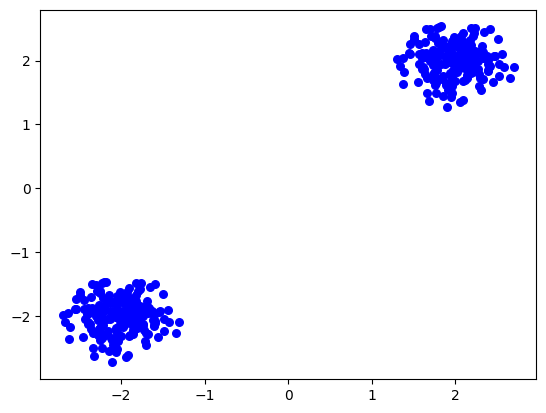

In [28]:
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1],
            color="blue", label="Normal", s=30)

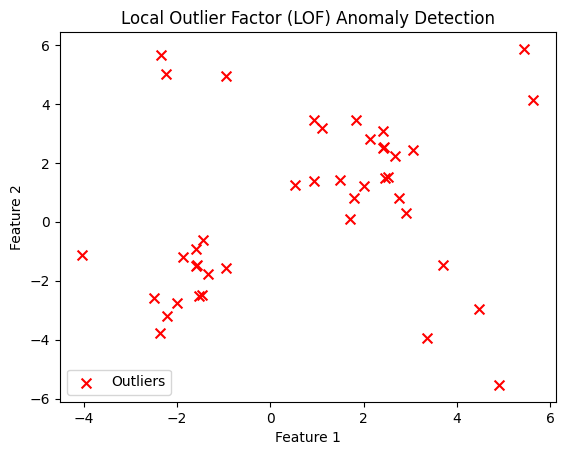

In [29]:
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1],
            color="red", label="Outliers", s=50, marker="x")

plt.title("Local Outlier Factor (LOF) Anomaly Detection")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

1. Anomaly Detection in Streaming Data

Streaming data = har 15 min pe naya energy usage point aa raha hai.
Abnormal spikes/drops detect karne ke liye:

Isolation Forest → Efficient for real-time, detects rare anomalies.

Local Outlier Factor (LOF) → Detects anomalies based on local density (agar ek region ka usage sudden high/low ho jaaye to pakad lega).

DBSCAN → Useful for clustering + anomaly detection (outliers = points not fitting in any cluster).

Choice: For real-time anomaly detection, Isolation Forest is best → fast, scalable, works well with high-dimensional features (timestamp, region, weather, usage).
We can also combine it with rolling z-score / moving average to catch short spikes quickly.

2. Time Series Forecasting Model

Goal = short-term demand forecast (next few hours).

ARIMA → Only works with univariate, no external features.

SARIMA → Adds seasonality (daily/weekly cycles in demand).

SARIMAX → Can also include exogenous features (like temperature, humidity, region demand).

Choice: SARIMAX is most suitable → because energy demand strongly depends on weather + time of day + region.
Example: Hot weather → high AC usage → demand spike.

3. Validation & Monitoring Performance

Offline Validation:

Train-test split on historical data.

Rolling forecast origin / walk-forward validation (since time series).

Metrics: RMSE, MAPE (mean absolute percentage error).

Real-Time Monitoring:

Continuously compare predicted demand vs actual demand.

Drift detection (concept drift agar pattern change ho gaya).

Retrain model periodically (weekly/monthly) with new data.

Anomaly Detection Validation:

Precision, Recall, F1-score (agar ground truth anomaly labels available ho).

Business feedback loop (grid operators validate anomalies flagged by model).

4. Business Value

Grid Stability: Early anomaly detection → prevents blackouts/overloads.

Demand Forecasting: Better short-term predictions → optimize power generation & distribution.

Cost Savings: Avoid overproduction (wastage) or underproduction (shortage, penalties).

Real-Time Alerts: Operators can act quickly on abnormal spikes/drops.

Strategic Planning: Long-term data helps plan infrastructure upgrades.